In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [19]:
data=pd.read_csv('mobilepriceclassification.csv')


In [20]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [21]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [22]:
data.shape

(2000, 21)

In [23]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [25]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [26]:
#Checking for null values

In [27]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [28]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


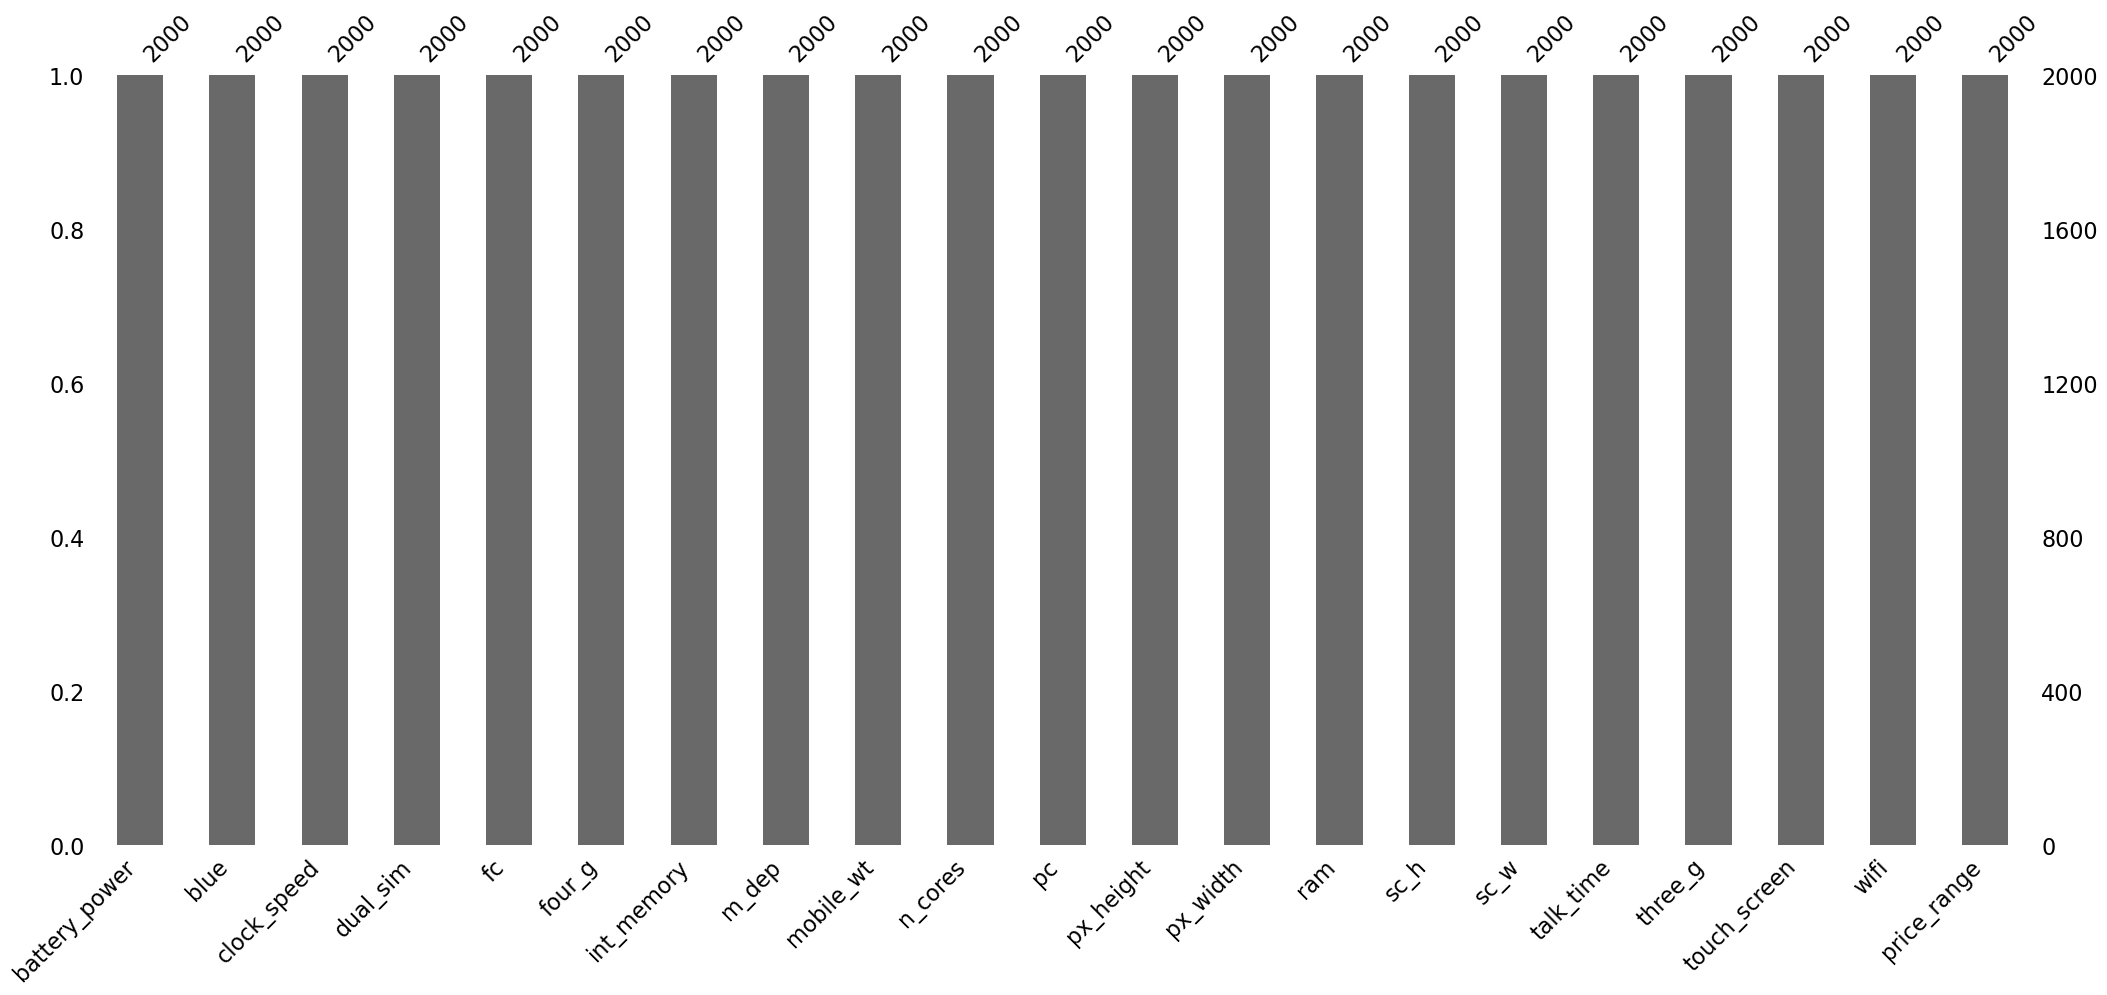

In [29]:
import missingno as msno
msno.bar(data)
plt.show()

In [30]:
#Checking the variance

In [31]:
data.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

In [32]:
data['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [33]:
#Exploratory Data Analysis

In [34]:
#Relationship between ram and price

<AxesSubplot:xlabel='price_range', ylabel='ram'>

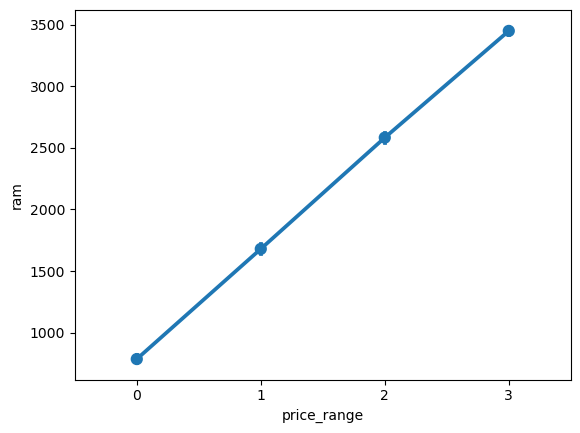

In [36]:
sns.pointplot(y='ram',x='price_range',data=data)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

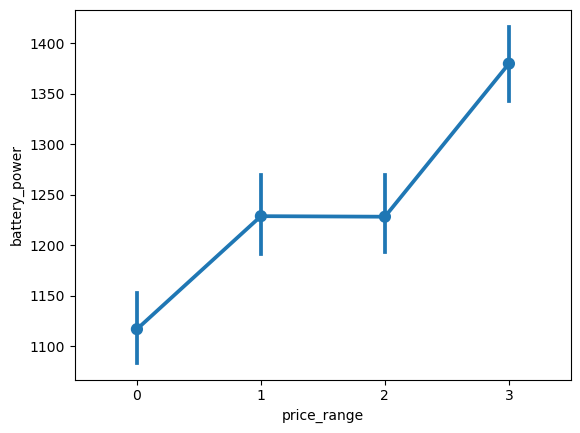

In [37]:
#Relationship between battery and price
sns.pointplot(x='price_range',y='battery_power',data=data)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

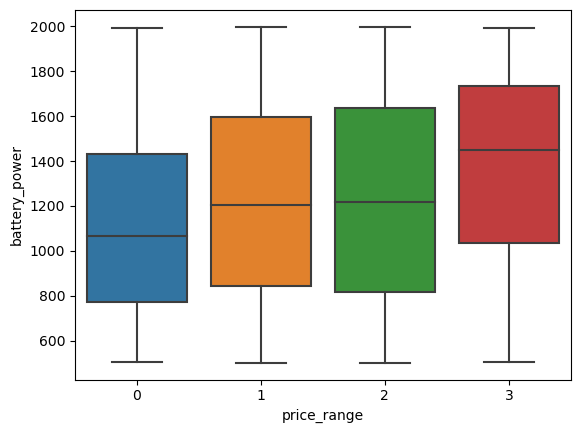

In [38]:
sns.boxplot(x='price_range',y='battery_power',data=data)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

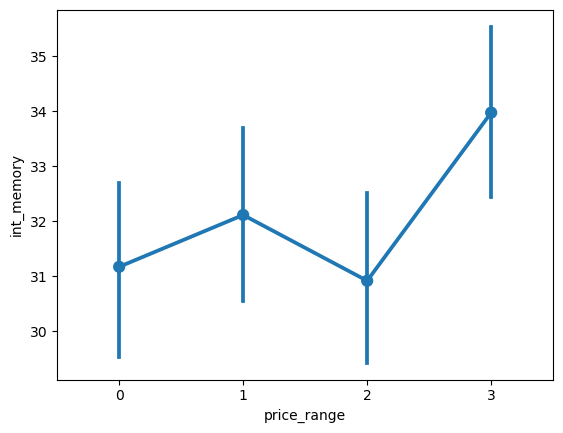

In [39]:
#Relationship between memory and price
sns.pointplot(x='price_range',y='int_memory',data=data)

In [40]:
col = data.columns
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [41]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

In [42]:
categorical_col 

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'price_range']

In [43]:
#Count Plot for all the columns

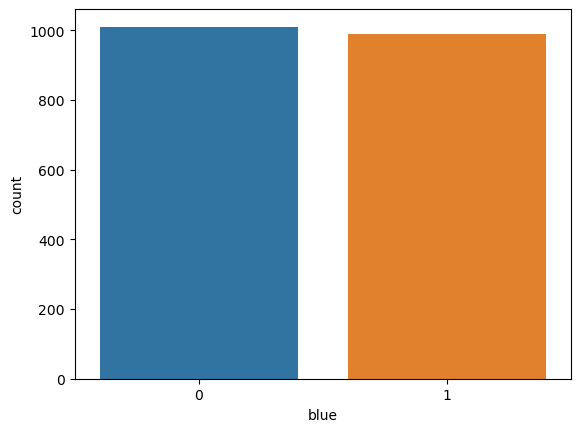

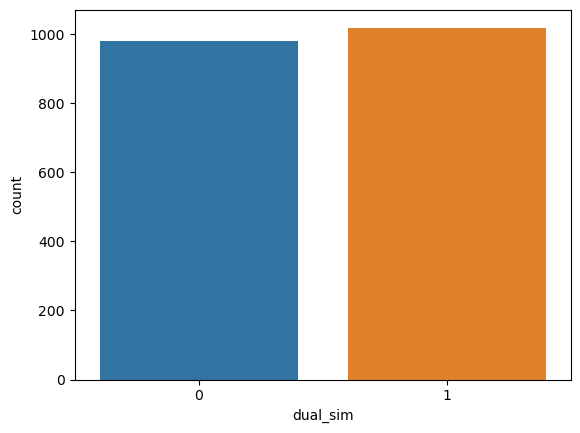

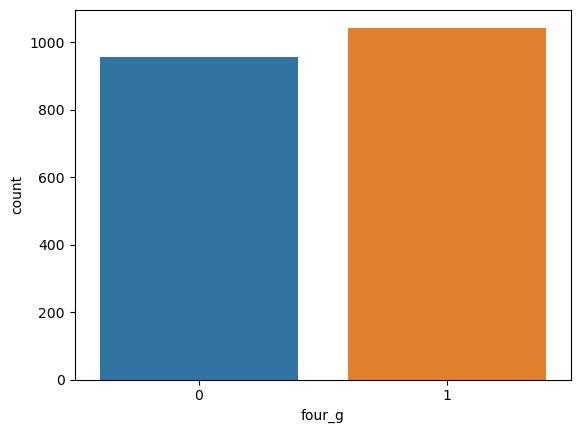

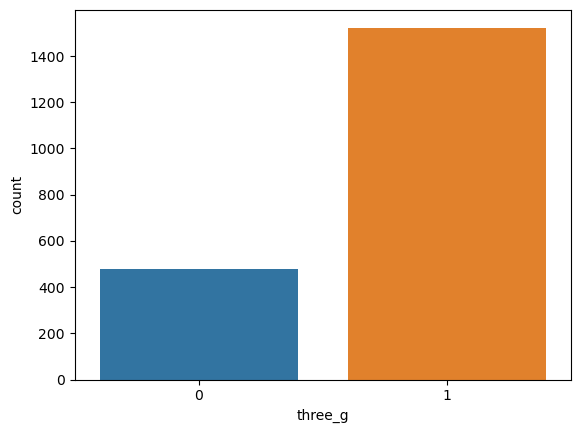

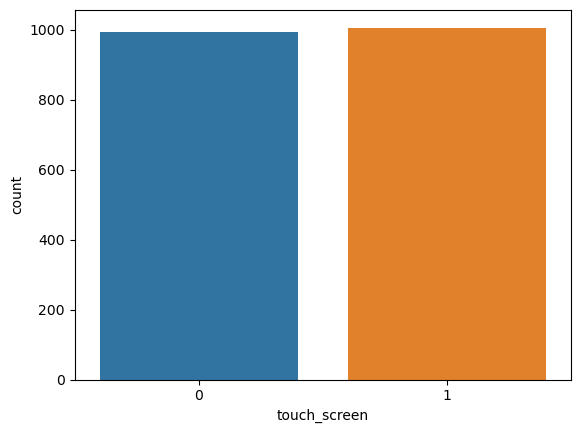

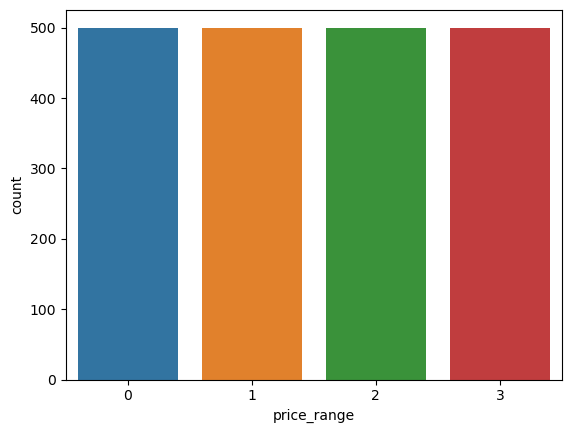

In [44]:
for i in categorical_col:
  sns.countplot(data[i])
  plt.xlabel(i)
  plt.show()

In [45]:
#Histogram

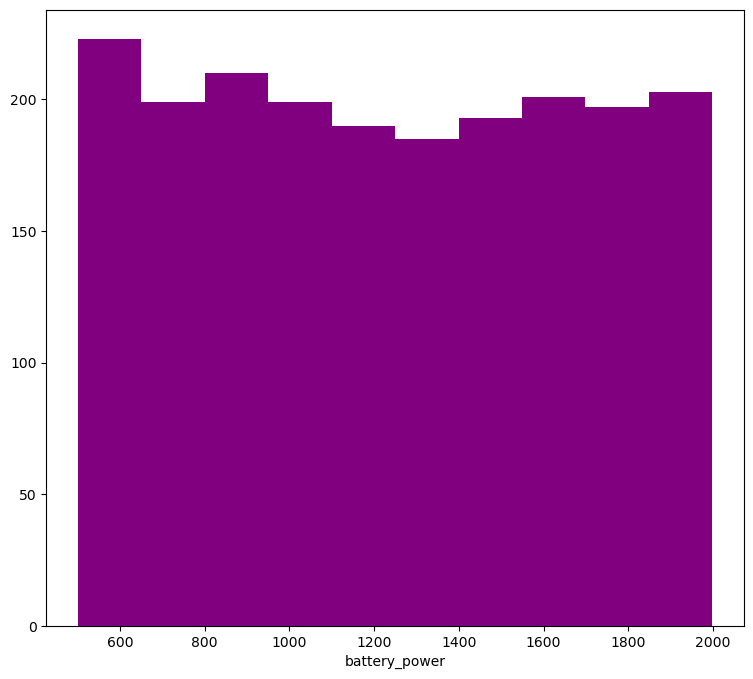

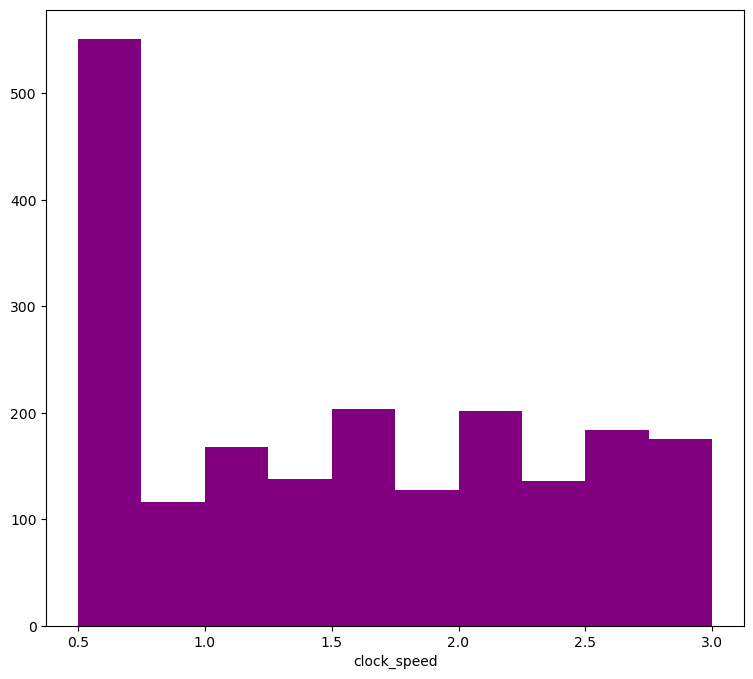

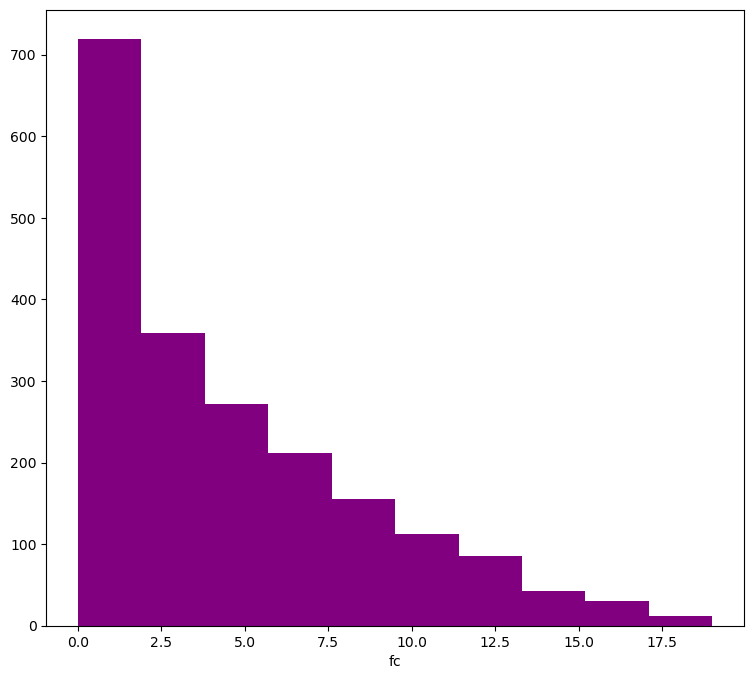

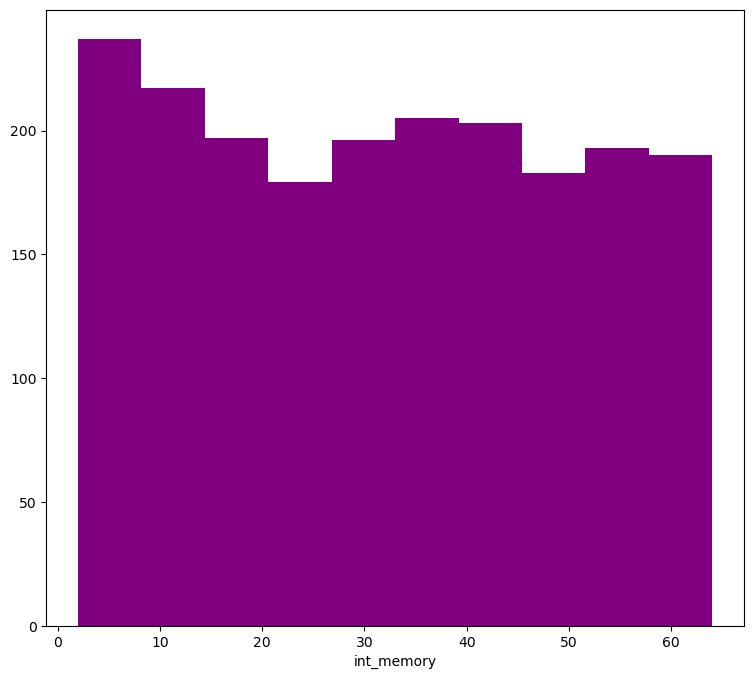

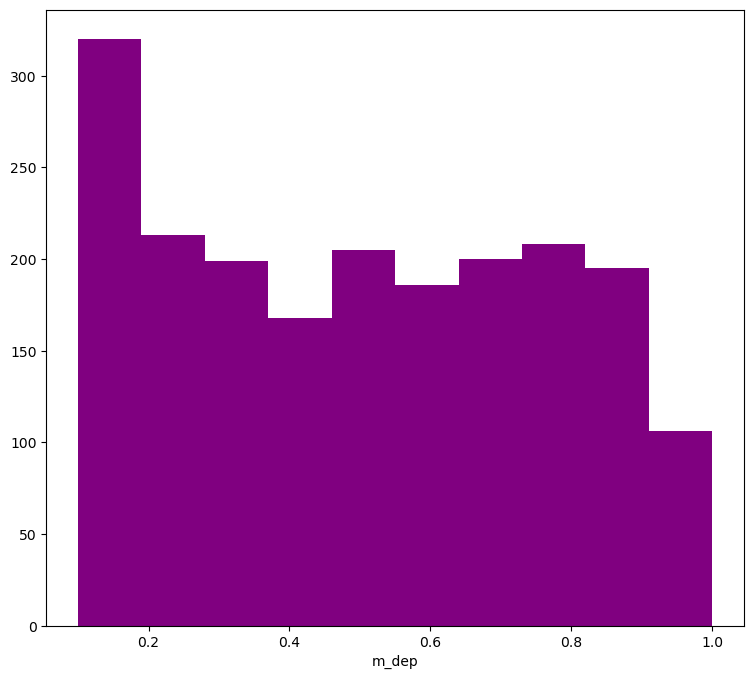

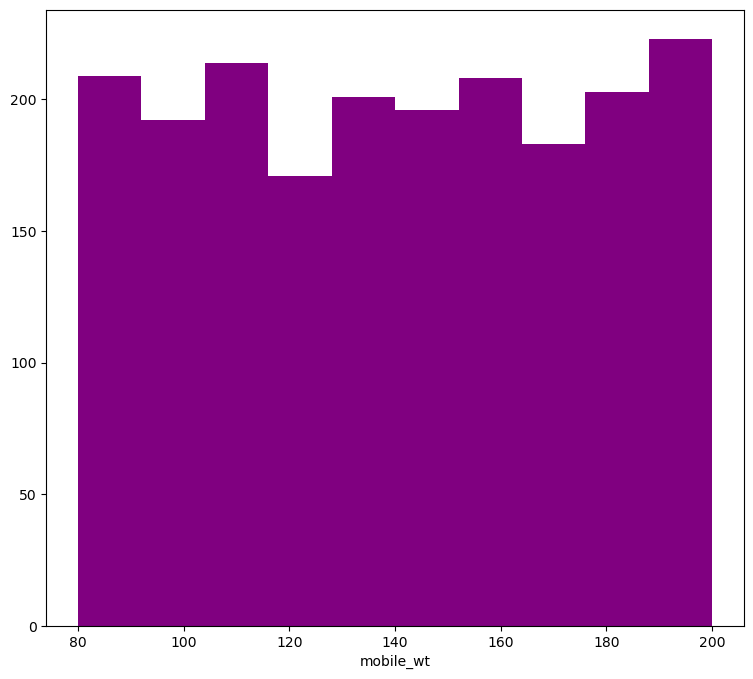

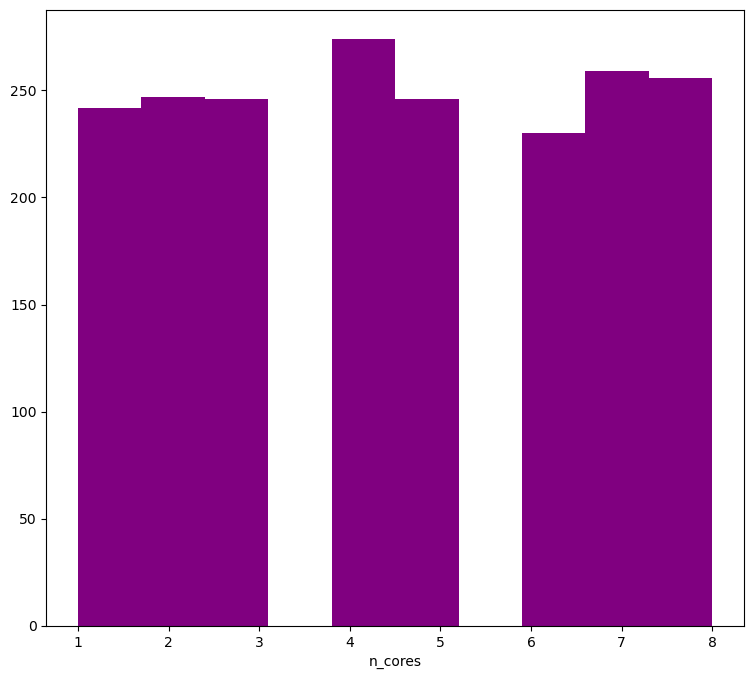

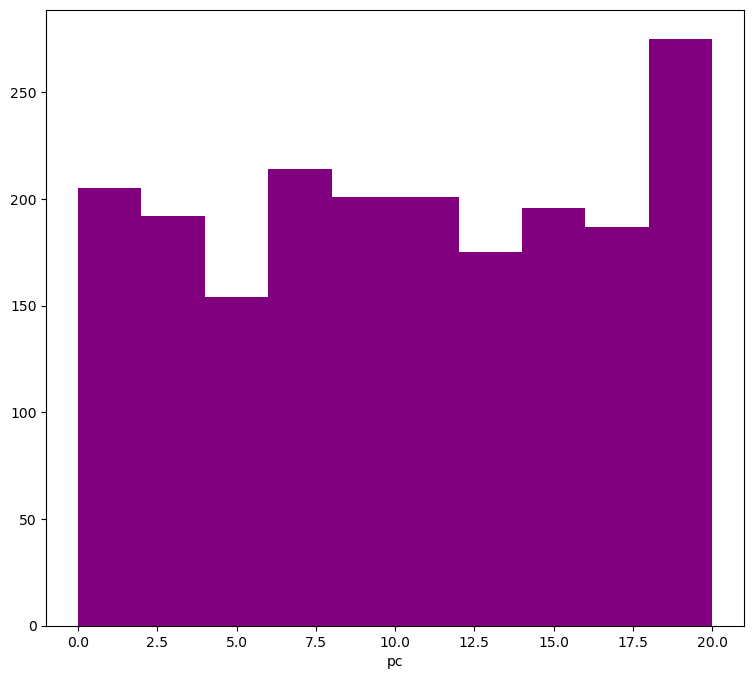

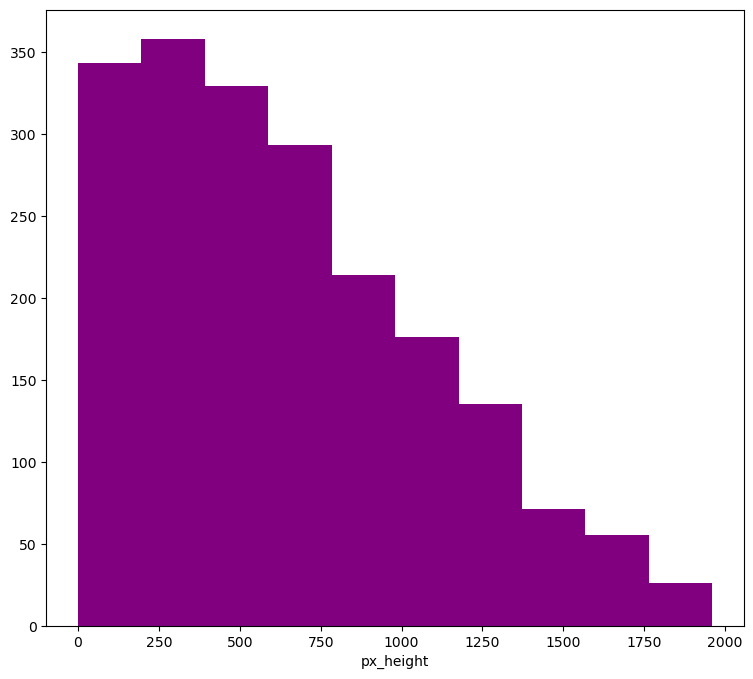

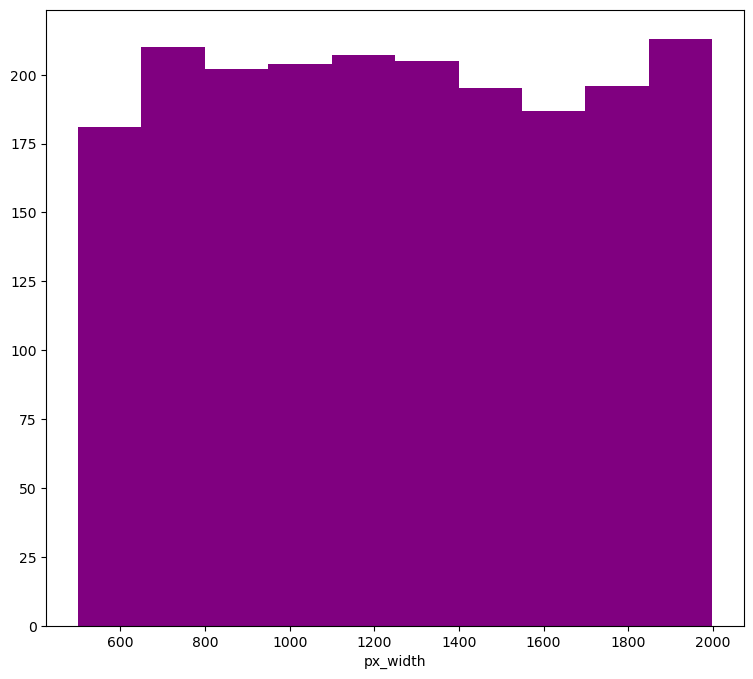

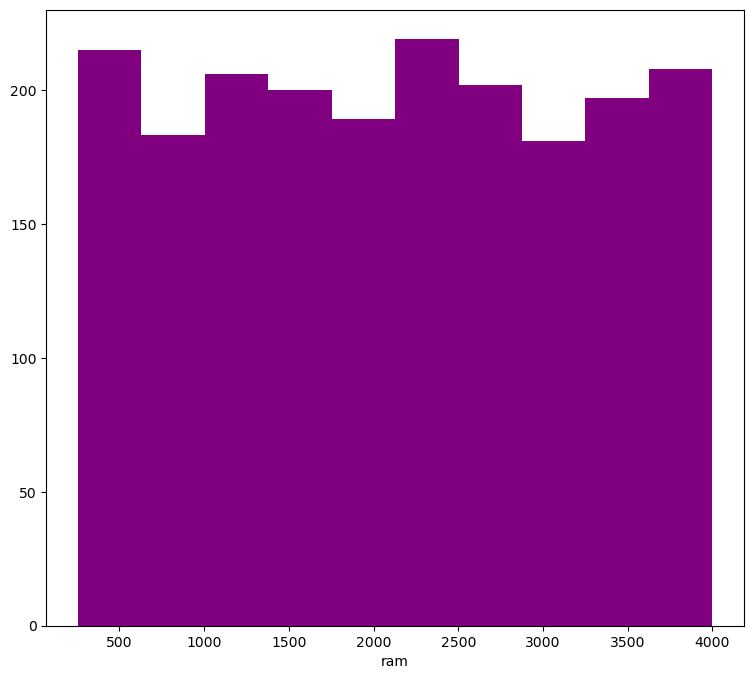

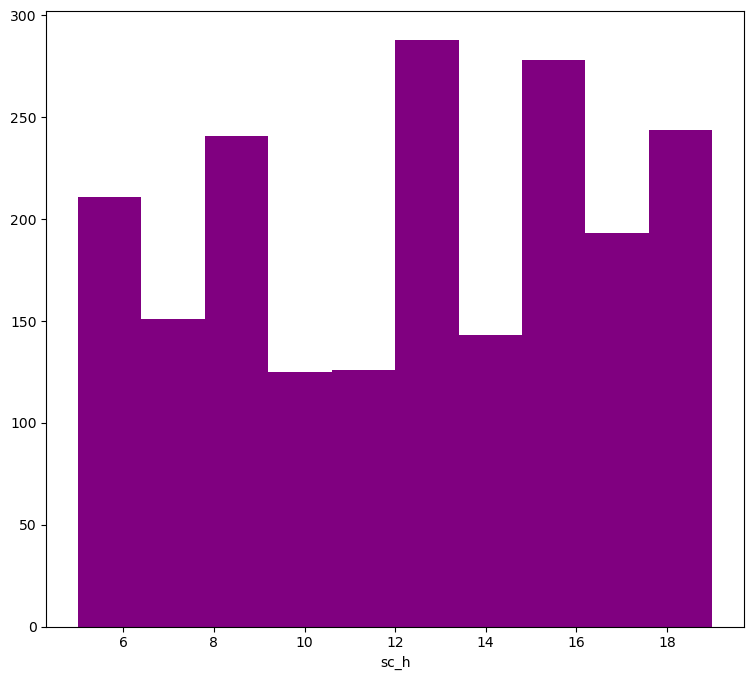

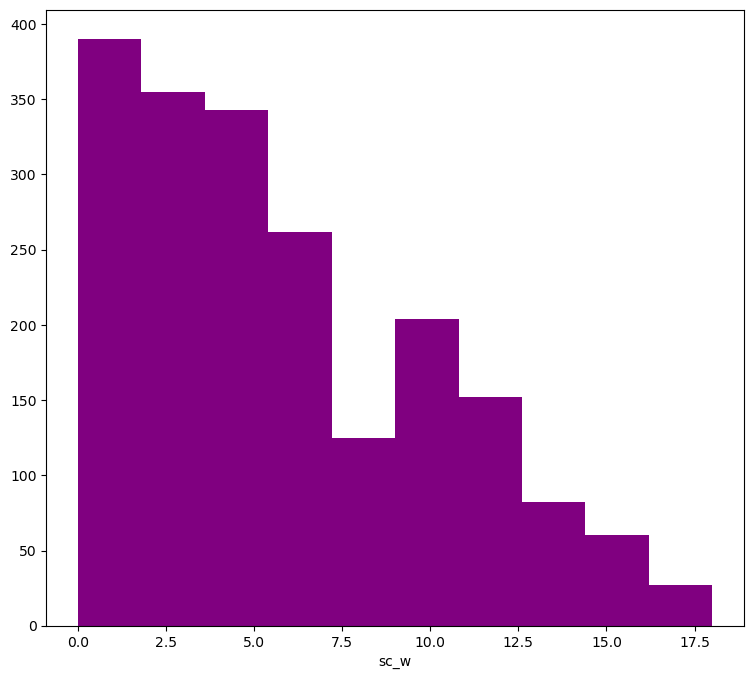

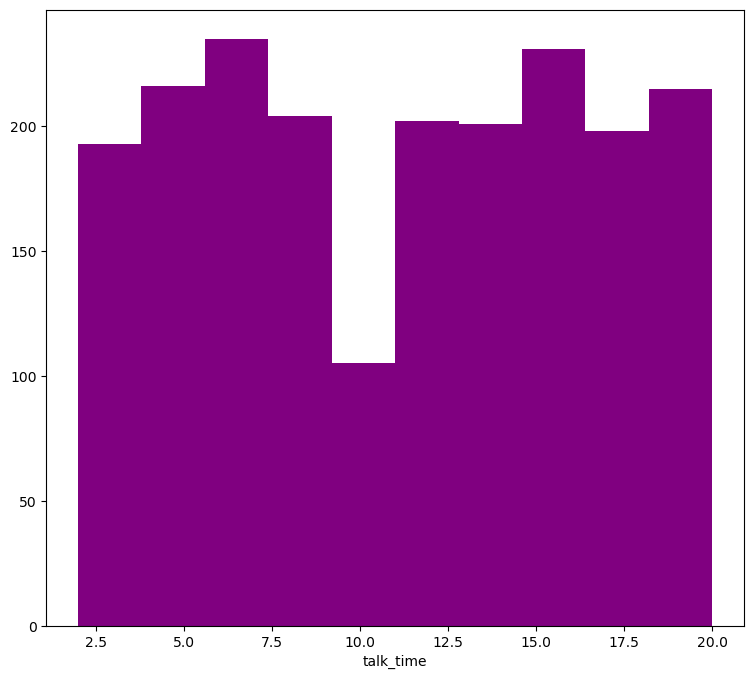

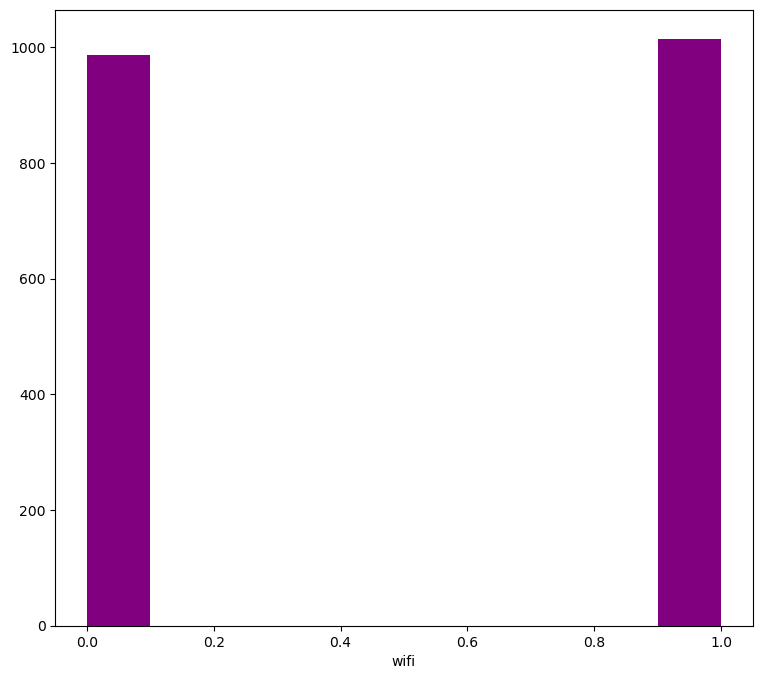

In [47]:
for i in data.drop(data[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(data[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

In [48]:
#Checking the correlation by plotting correlation plot

Text(0.5, 1.0, 'Correlation ')

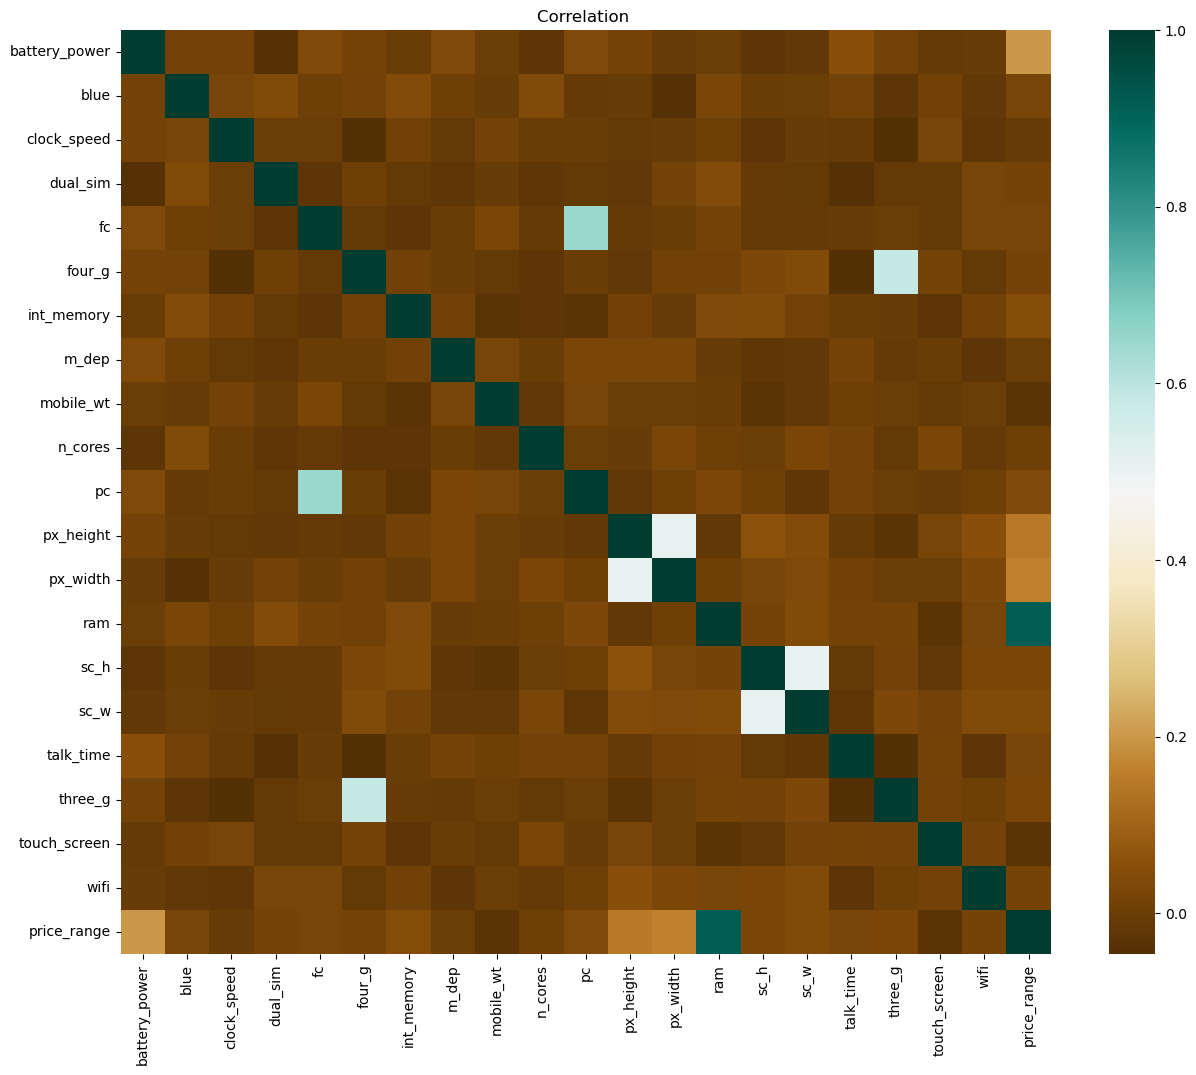

In [49]:
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

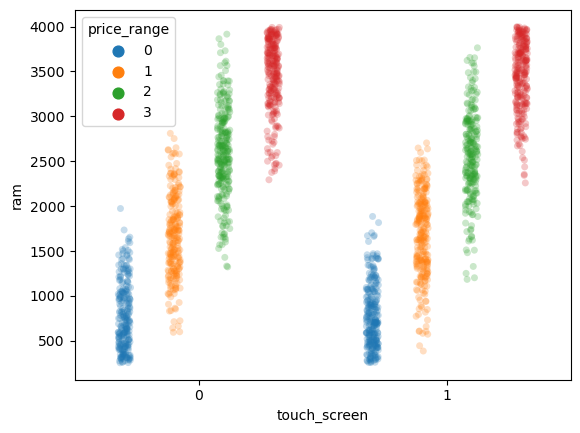

In [51]:
# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=data, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

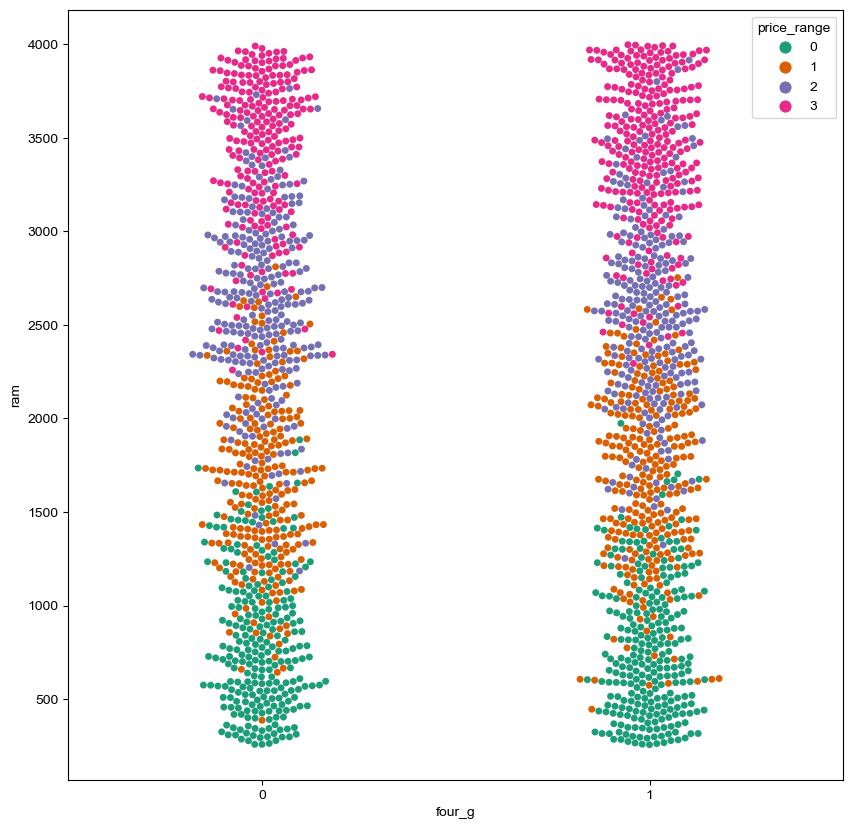

In [52]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=data)
ax=sns.set(style="darkgrid")


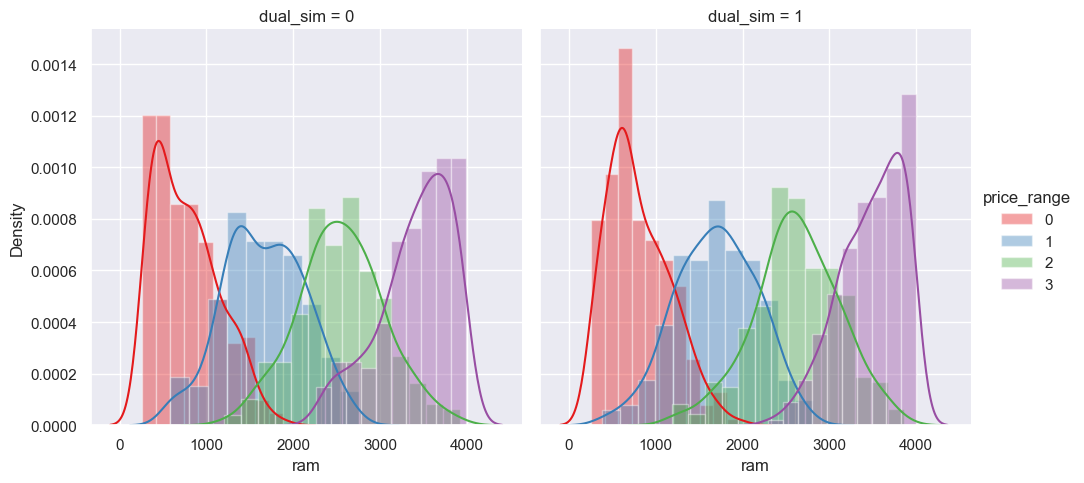

In [53]:
g = sns.FacetGrid(data, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

In [54]:
x=data.drop('price_range',axis=1)
y=data['price_range']

In [55]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [56]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [57]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [58]:
scale

StandardScaler()

In [59]:
scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.009945,battery_power
1,1.011342,blue
2,1.006025,clock_speed
3,1.011555,dual_sim
4,1.718987,fc
5,1.528509,four_g
6,1.009274,int_memory
7,1.006385,m_dep
8,1.004548,mobile_wt
9,1.008442,n_cores


In [61]:
#3G supported phones

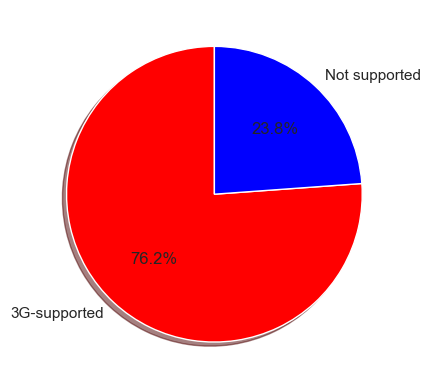

In [62]:
labels = ["3G-supported",'Not supported']
values = data['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [63]:
#4G supported phones

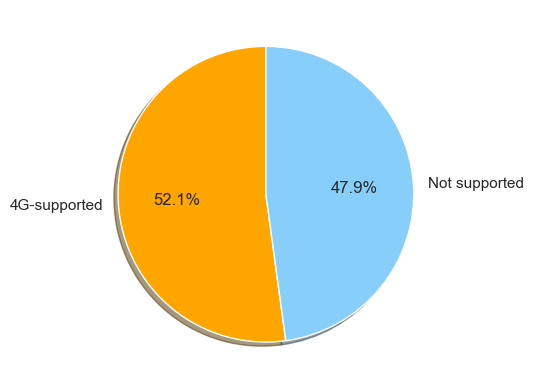

In [64]:
labels = ["4G-supported",'Not supported']
values = data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

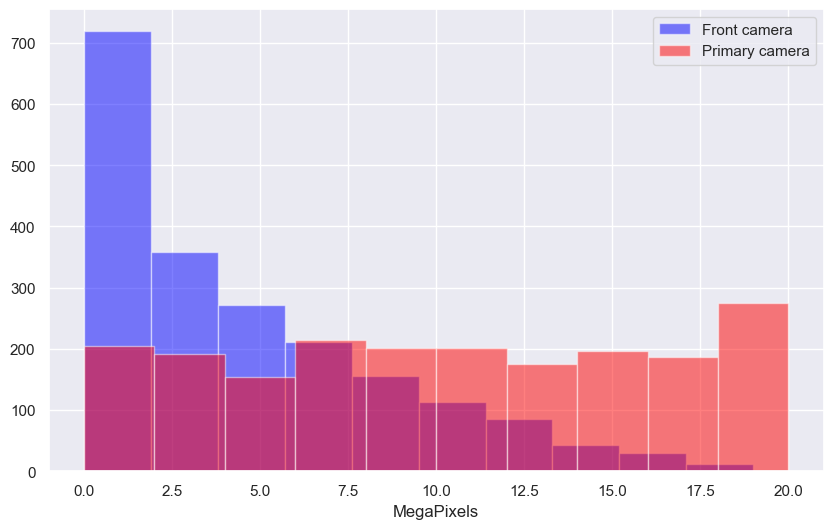

In [65]:
plt.figure(figsize=(10,6))
data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [66]:
#Models

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

In [68]:
#1.Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)




y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:64.26666666666667
Test Set Accuracy:63.0

Confusion Matrix:
[[97 24  0  0]
 [27 66 35  1]
 [ 1 30 57 29]
 [ 0  5 33 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       121
           1       0.53      0.51      0.52       129
           2       0.46      0.49      0.47       117
           3       0.76      0.71      0.74       133

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.63      0.63      0.63       500



In [70]:
#2.KNeighborsClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_test_pred1 = knn.predict(x_test)
y_train_pred1=knn.predict(x_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:95.13333333333334
Test Set Accuracy:89.8

Confusion Matrix:
[[124  15   0   0]
 [  1 104  12   0]
 [  0   6 110  14]
 [  0   0   3 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       139
           1       0.83      0.89      0.86       117
           2       0.88      0.85      0.86       130
           3       0.89      0.97      0.93       114

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [72]:
#3.SVC

In [73]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_test_pred2 = svc.predict(x_test)
y_train_pred2=svc.predict(x_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Train Set Accuracy:94.93333333333334
Test Set Accuracy:94.0

Confusion Matrix:
[[124   8   0   0]
 [  1 114   9   0]
 [  0   3 112   5]
 [  0   0   4 120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       132
           1       0.91      0.92      0.92       124
           2       0.90      0.93      0.91       120
           3       0.96      0.97      0.96       124

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [74]:
#4.DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_pred3 = dtc.predict(x_test)
y_train_pred3=dtc.predict(x_train)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:80.80000000000001

Confusion Matrix:
[[109  16   0   0]
 [ 16  96  24   1]
 [  0  13  86  11]
 [  0   0  15 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       125
           1       0.77      0.70      0.73       137
           2       0.69      0.78      0.73       110
           3       0.90      0.88      0.89       128

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [76]:
# hyper parameter tuning

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [77]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 4}

In [78]:
dtc = grid_search.best_estimator_

In [79]:
dtc

DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, min_samples_split=4)

In [80]:
y_predi=dtc.predict(x_test)


In [81]:
y_predi

array([1, 3, 3, 1, 3, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 3, 3, 2, 0, 1, 2, 3, 3, 1, 3, 0, 3, 0, 1, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 3, 3, 1, 2, 3, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 1, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 2, 1, 3, 1, 1, 0, 3, 3, 3, 3, 2, 2, 3, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 3, 2, 0, 0, 3, 1, 1, 0, 3, 3, 2, 3, 2, 1, 1, 2, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 3, 1, 2, 1, 0, 1, 1, 0, 3, 2, 2, 3, 3, 3, 1, 1, 0,
       0, 1, 0, 3, 1, 3, 2, 0, 1, 3, 0, 1, 1, 0, 1, 1, 3, 1, 2, 2, 3, 0,
       1, 3, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 3, 3, 0, 3, 1, 2, 3, 3, 3,
       1, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 3,
       1, 3, 2, 2, 2, 0, 2, 1, 1, 3, 1, 1, 1, 2, 3, 2, 3, 1, 2, 1, 0, 1,
       3, 1, 0, 2, 1, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 1, 2, 3, 3, 3,
       1, 0, 1, 2, 1, 3, 3, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2,
       2, 3, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 3, 1, 2,

In [82]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_predi)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 0.9226666666666666
Test Accuracy of SVC Model is 0.84


In [83]:
#5.AdaBoostClassifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                                                min_samples_leaf=8,
                                                                                min_samples_split=4)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [85]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 70}

In [86]:
grid_search.best_score_

0.9206666666666667

In [87]:
ad = grid_search.best_estimator_
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         min_samples_leaf=8,
                                                         min_samples_split=4),
                   learning_rate=1, n_estimators=70)

In [88]:
y_pred = ad.predict(x_test)


In [89]:
y_pred

array([1, 3, 2, 1, 3, 1, 0, 0, 3, 0, 1, 3, 1, 2, 0, 2, 1, 1, 1, 1, 2, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 3, 3, 1, 3, 1, 3, 0, 1, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 3, 3, 1, 2, 3, 0, 2, 0, 0, 2, 2, 0,
       1, 0, 3, 0, 0, 1, 1, 3, 1, 3, 0, 2, 2, 1, 2, 1, 3, 3, 2, 2, 0, 0,
       0, 2, 1, 3, 0, 1, 0, 3, 3, 3, 2, 2, 2, 2, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 3, 2, 0, 0, 3, 1, 1, 0, 3, 3, 2, 3, 2, 1, 1, 2, 0, 0, 2, 0, 1,
       0, 1, 2, 0, 1, 3, 1, 3, 2, 0, 1, 1, 0, 3, 2, 2, 3, 3, 3, 1, 1, 0,
       0, 2, 0, 2, 1, 3, 2, 0, 1, 3, 1, 1, 1, 0, 1, 2, 3, 0, 2, 2, 3, 0,
       1, 3, 1, 2, 0, 0, 1, 1, 3, 2, 0, 1, 0, 2, 2, 0, 3, 1, 2, 3, 3, 2,
       0, 3, 2, 2, 2, 0, 1, 3, 1, 3, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3,
       0, 3, 2, 2, 3, 0, 2, 1, 0, 3, 1, 1, 1, 2, 3, 2, 3, 1, 2, 1, 0, 2,
       3, 1, 0, 2, 0, 3, 1, 0, 0, 2, 1, 3, 0, 0, 0, 0, 2, 1, 2, 3, 3, 3,
       1, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 3, 2, 2, 1, 1,
       3, 3, 3, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3, 1, 2,

In [90]:
ada_train_acc = accuracy_score(y_train, ad.predict(x_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {ada_train_acc}")
print(f"Test Accuracy of Random Forest Model is {ada_test_acc}")

Training Accuracy of Random Forest Model is 1.0
Test Accuracy of Random Forest Model is 0.894


In [91]:
#6.GradientBoostingClassifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_test_pred6 = gbc.predict(x_test)
y_train_pred6=gbc.predict(x_train)

gbc_acc=accuracy_score(y_test_pred6,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:90.8

Confusion Matrix:
[[121   8   0   0]
 [  4 108  10   0]
 [  0   9 111  11]
 [  0   0   4 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       129
           1       0.86      0.89      0.87       122
           2       0.89      0.85      0.87       131
           3       0.91      0.97      0.94       118

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [93]:
#7.XGBClassifier

In [95]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [96]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(x_train, y_train)

y_test_pred7 = xgb.predict(x_test)
y_train_pred7=xgb.predict(x_train)

xgb_acc= accuracy_score(y_test_pred7,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred7,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred7,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred7,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred7,y_test))

Train Set Accuracy:93.06666666666666
Test Set Accuracy:84.6

Confusion Matrix:
[[118  15   0   0]
 [  7 101  21   0]
 [  0   9  95  16]
 [  0   0   9 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       133
           1       0.81      0.78      0.80       129
           2       0.76      0.79      0.78       120
           3       0.87      0.92      0.90       118

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [97]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC',  'Decision Tree Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier',  'XgBoost'],
    'Score': [lr_acc, knn_acc, svc_acc, dtc_test_acc, ada_test_acc, gbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.940
5,Gradient Boosting Classifier,0.908
1,KNN,0.898
4,Ada Boost Classifier,0.894
6,XgBoost,0.846
3,Decision Tree Classifier,0.840
0,Logistic Regression,0.630


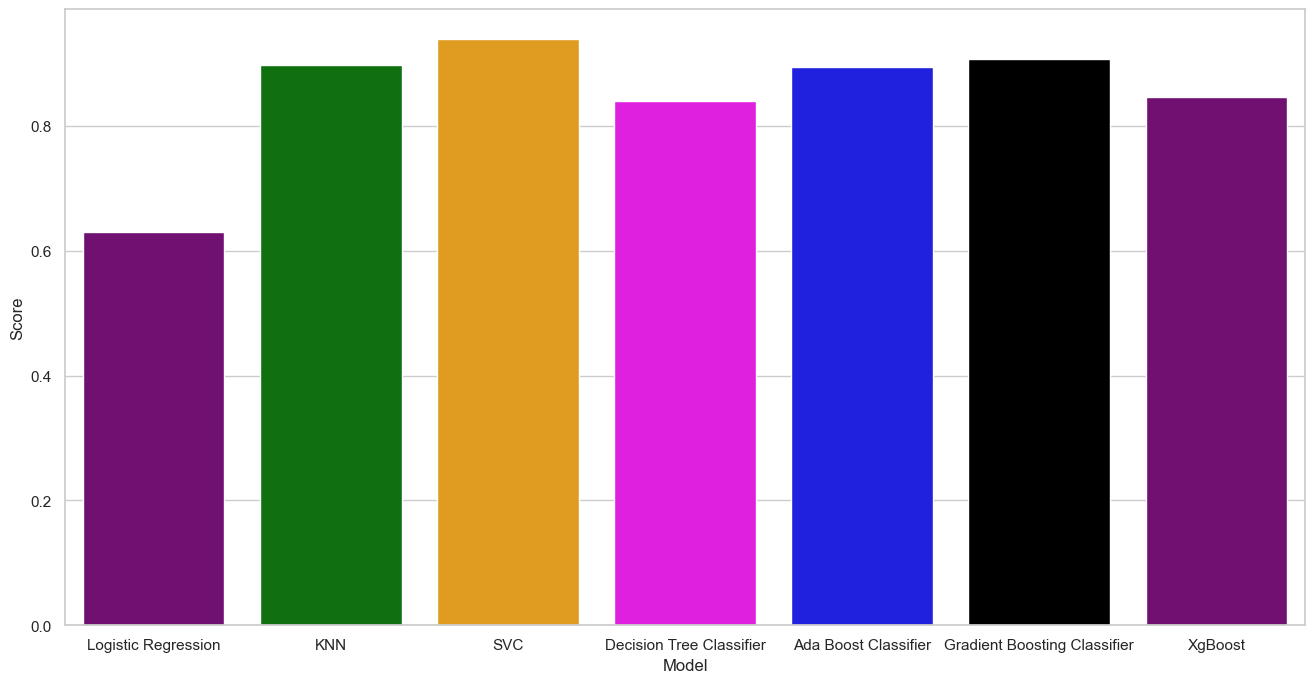

In [98]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()